In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
pd.set_option("display.max_columns",999)
rcParams['figure.figsize'] = 15, 6

### Check Stationarity of a Time Series
A TS is said to be stationary if its statistical properties such as mean, variance remain constant over time. Most of the TS models work on the assumption that the TS is stationary. Intuitively, we can sat that if a TS has a particular behaviour over time, there is a very high probability that it will follow the same in the future. Also, the theories related to stationary series are more mature and easier to implement as compared to non-stationary series.

Stationarity is defined using very strict criterion. However, for practical purposes we can assume the series to be stationary if it has constant statistical properties over time, ie. the following:

1. constant mean
1. constant variance
1. an autocovariance that does not depend on time.

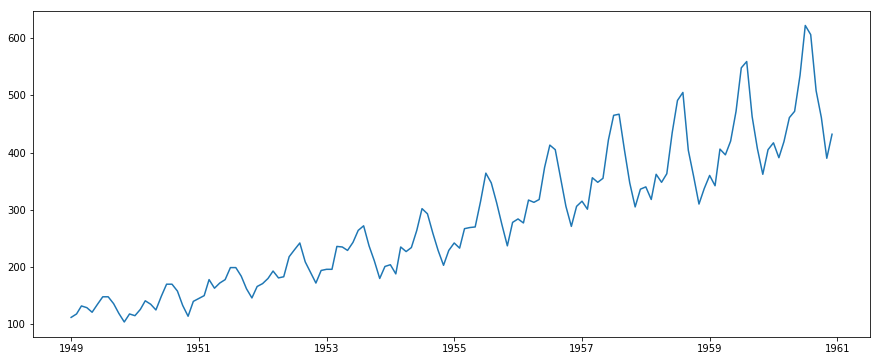

In [30]:
plt.plot(ts);

It is evident that there is an overall increasing trend in the data along with some seasonal variations. However, it might not always be possible to make such visual inferences. So, we can check stationarity using the following:

1. **Plotting Rolling Statistics**: We can plot the moving average or moving variance and see if it varies with time. By moving average/variance I mean that at any instant ‘t’, we’ll take the average/variance of the last year, i.e. last 12 months. But again this is more of a visual technique.
1. **Dickey-Fuller Test**: This is one of the statistical tests for checking stationarity. Here the null hypothesis is that the TS is non-stationary. The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary. 

In [33]:
# defined a function which takes a TS as input and generate
# rolling statistics plots along with Dickey-Fuller test results 

from statsmodels.tsa.stattools import adfuller
from pandas.core import datetools

def test_stationarity(timeseries):
    # Calculate rolling statistics 
    rolmean = pd.rolling_mean(timeseries, window = 12)
    rolstd = pd.rolling_std(timeseries, window = 12)
    
    # Plot rolling statistics:
    orig = plt.plot(timeseries, color = 'blue' , label = 'Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
    std = plt.plot(rolstd, color = 'black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block = False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

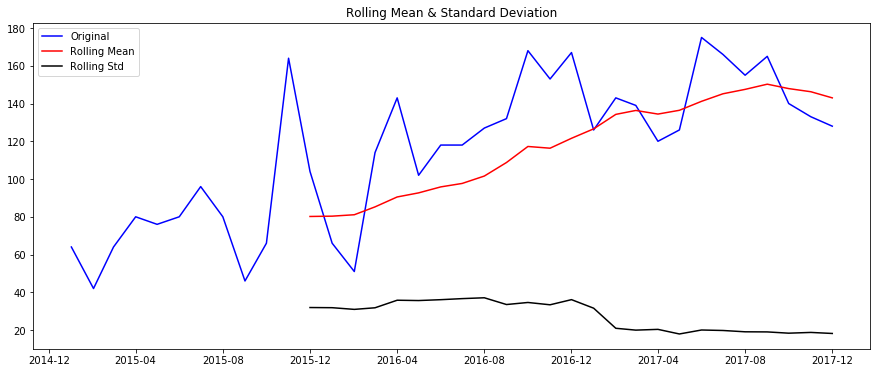

Results of Dickey-Fuller Test:
Test Statistic                 -1.529663
p-value                         0.518790
#Lags Used                      3.000000
Number of Observations Used    32.000000
Critical Value (1%)            -3.653520
Critical Value (5%)            -2.957219
Critical Value (10%)           -2.617588
dtype: float64


In [34]:
test_stationarity(sales_data[2010])

Test Statistic                 -1.529663
p-value                         0.518790
#Lags Used                      3.000000
Number of Observations Used    32.000000
Critical Value 1%              -3.653520
Critical Value 5%              -2.957219
Critical Value 10%             -2.617588
dtype: float64


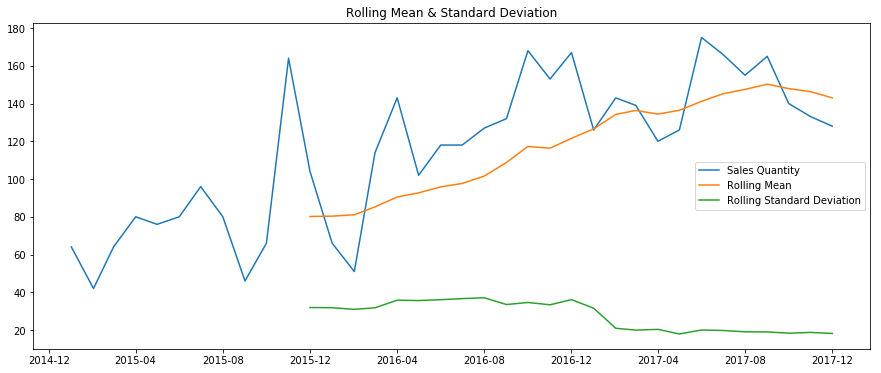

In [18]:
import warnings; warnings.simplefilter('ignore')
sales_data = pd.read_excel("salesdata.xlsx", index_col='SKU #').transpose()

# Determing rolling statistics

rolling_mean= pd.rolling_mean(sales_data[2010], window=12)
rolling_std = pd.rolling_std(sales_data[2010], window=12)

# Plot rolling statistics:
plt.plot(sales_data[2010], label = 'Sales Quantity')
plt.plot(rolling_mean, label = 'Rolling Mean')
plt.plot(rolling_std, label = 'Rolling Standard Deviation')
plt.legend(loc = 'right')
plt.title('Rolling Mean & Standard Deviation');


# Perform Dickey-Fuller test:
# Augmented Dickey-Fuller unit root test
# statsmodels.tsa.stattools.adfuller(x, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)
from statsmodels.tsa.stattools import adfuller

dickey_test = adfuller(sales_data[2010], autolag = 'AIC')
dickey_output = pd.Series(dickey_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key, value in dickey_test[4].items():
    dickey_output['Critical Value {}'.format(key)] = value
print(dickey_output)


Note: 
This is not a stationary series because the mean changes with time
Also, 
* Test Statistic (-1.53) is MORE than the critical values
Hence, reject null hypothesis (that there is unit root). Therefore, we CANNOT reject that there is NO unit root.


### Augmented Dickey-Fuller unit root test

The Augmented Dickey-Fuller test can be used to test for a unit root in a univariate process in the presence of serial correlation.

The null hypothesis of the Augmented Dickey-Fuller is that there is a unit root, with the alternative that there is no unit root. If the pvalue is above a critical size, then we cannot reject that there is a unit root.

(a unit root is a feature of some stochastic processes that can cause problems in statistical inference involving time series models. A linear stochastic process has a unit root if 1 is a root of the process's characteristic equation. Such a process is non-stationary but does not always have a trend.)

The p-values are obtained through regression surface approximation from MacKinnon 1994, but using the updated 2010 tables. If the p-value is close to significant, then the critical values should be used to judge whether to reject the null.


* A small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, so you reject the null hypothesis.

* A large p-value (> 0.05) indicates weak evidence against the null hypothesis, so you fail to reject the null hypothesis.

* p-values very close to the cutoff (0.05) are considered to be marginal (could go either way). Always report the p-value so your readers can draw their own conclusions.

For example, suppose a pizza place claims their delivery times are 30 minutes or less on average but you think it’s more than that. You conduct a hypothesis test because you believe the null hypothesis, Ho, that the mean delivery time is 30 minutes max, is incorrect. Your alternative hypothesis (Ha) is that the mean time is greater than 30 minutes. 

You randomly sample some delivery times and run the data through the hypothesis test, and your p-value turns out to be 0.001, which is much less than 0.05. **In real terms, there is a probability of 0.001 that you will mistakenly reject the pizza place’s claim that their delivery time is less than or equal to 30 minutes. **

Since typically we are willing to reject the null hypothesis when this probability is less than 0.05, you conclude that the pizza place is wrong; their delivery times are in fact more than 30 minutes on average

2 major reasons behind non-stationarity of a time series:
1. Trend – varying mean over time. For eg, in this case we saw that on average, the number of passengers was growing over time.
2. Seasonality – variations at specific time-frames. eg people might have a tendency to buy cars in a particular month because of pay increment or festivals.

**The underlying principle is to model or estimate the trend and seasonality in the series, and then remove them to get a stationary series. Only then can statistical forecasting techniques can be implemented.**

The final step would be to convert the forecasted values into the original scale by applying trend and seasonality constraints back.

## Method 1: Decompose by moving average

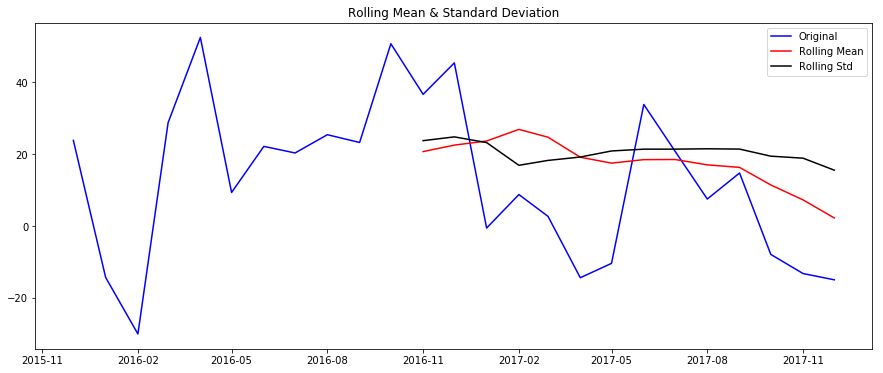

Results of Dickey-Fuller Test:
Test Statistic                 -1.512720
p-value                         0.527210
#Lags Used                      9.000000
Number of Observations Used    15.000000
Critical Value (1%)            -3.964443
Critical Value (5%)            -3.084908
Critical Value (10%)           -2.681814
dtype: float64


In [47]:
log_sales_2010 = np.log(sales_data[2010])
sales_2010_log_rolling_mean_diff = sales_data[2010] - rolling_mean
sales_2010_log_rolling_mean_diff.dropna(inplace=True)
# plt.plot(sales_2010_wo_rolling.dropna(inplace= True))
# plt.plot(rolling_std)

test_stationarity(sales_2010_log_rolling_mean_diff)
# plt.plot(sales_data[2010])

Now, our test statistic is LARGER than all the critical values, and p-value is also MUCH larger than 0.05. Hence, this is NOT a stationary series

x = np.linspace(0, 2 * np.pi, 400)
plt.plot(x,  'r+')
plt.plot('xlabel', 'ylabel')

## Method 2: Decompose by EWMA

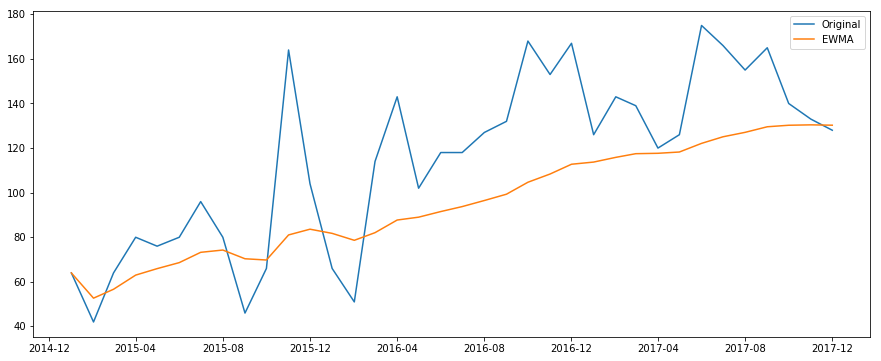

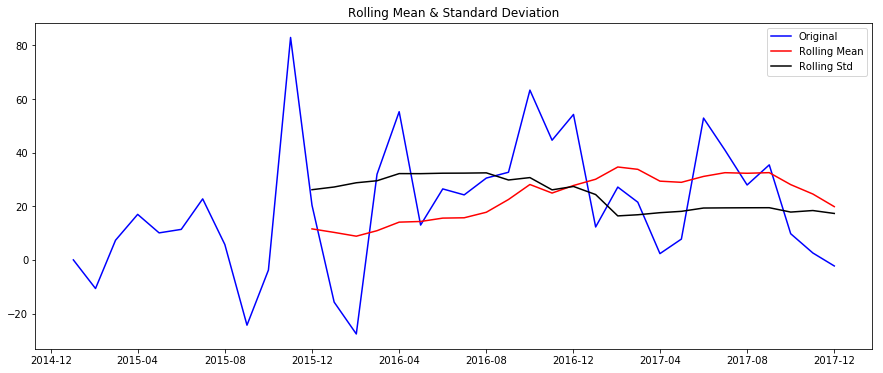

Results of Dickey-Fuller Test:
Test Statistic                 -4.780649
p-value                         0.000059
#Lags Used                      1.000000
Number of Observations Used    34.000000
Critical Value (1%)            -3.639224
Critical Value (5%)            -2.951230
Critical Value (10%)           -2.614447
dtype: float64


In [50]:
sales_2010_ewma = pd.ewma(sales_data[2010], halflife = 12)
plt.plot(sales_data[2010], label = "Original")
plt.plot(sales_2010_ewma, label = "EWMA")
plt.legend(loc= 'best')
plt.show();
sales_2010_ewma_diff = sales_data[2010]-sales_2010_ewma
test_stationarity(sales_2010_ewma_diff)

Notice that the Test Statistic is now MUCH smaller than all of the Critical values (the p-value is <0.05 too), which means the time series is actually stationary!
* Rolling values appear to be varying, **but there is no specific trend**

## Eliminating Trend and Seasonality

two ways of removing trend and seasonality:

1. Differencing – taking the differece with a particular time lag
2. Decomposition – modeling both trend and seasonality and removing them from the model.

### Autocorrelation Function (ACF): 
a measure of the correlation between the the TS with a lagged version of itself. For instance at lag 5, ACF would compare series at time instant ‘t1’…’t2’ with series at instant ‘t1-5’…’t2-5’ (t1-5 and t2 being end points).

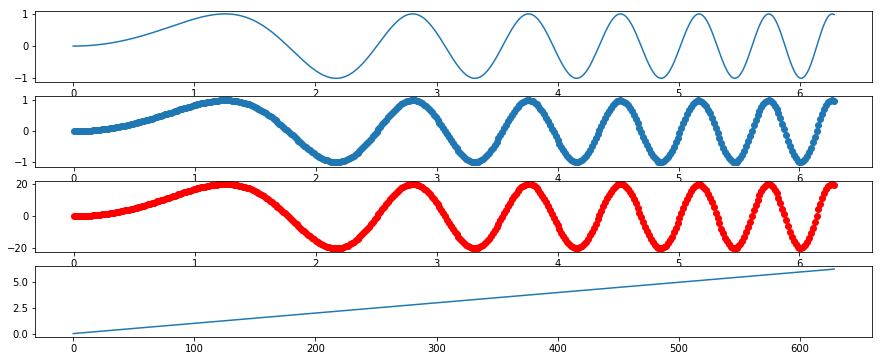

In [72]:
f, axarr = plt.subplots(4, sharex=False, sharey=False)
axarr[0].plot(x, y)
axarr[1].scatter(x, y)
axarr[2].scatter(x, 20 * y, color='r')
axarr[3].plot(x*100,x)

In [55]:
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

axarr[0].plot(x, y)
axarr[1].scatter(x, y)
axarr[2].scatter(x, 2 * y ** 2 - 1, color='r')
plt.show()

TypeError: 'AxesSubplot' object is not iterable

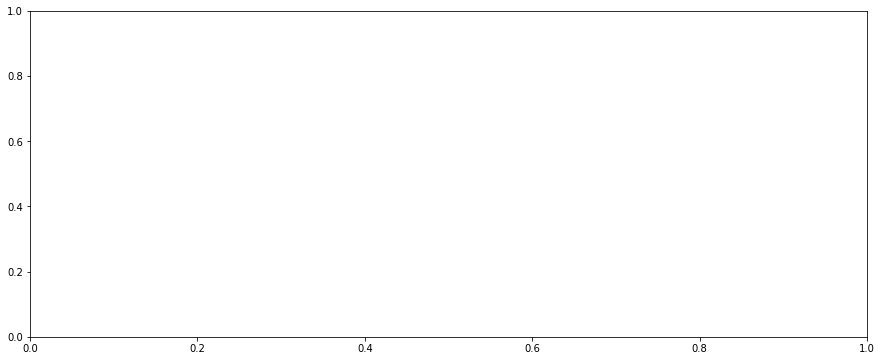

In [73]:
g, axarr = plt.subplot()
axarr.plot(x*100,x)